# <center>Laboratorium 2<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach wszystkie zadania na laboratorium wykonywać należy przy użyciu edytora [Spyder](https://www.spyder-ide.org/), sprawozdanie należy wykonać w środowisku [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania rysunków i obliczeń porównawczych należy zdefiniować
wektor 1000 punktów równoodległych na przedziale [-1,1]. W tym celu skożystać należy z funkcji *[linspace](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html)*  

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa dany wzorem
  
  $x(k) = \cos\left(\cfrac{k\pi}{n}\right)\ k = 1,2,...,n$


<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:
2. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$
1. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$
2. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $  
3. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$


  
***Wskazówka:*** *[Numpy](http://www.numpy.org/)* posiada zaimplementowane podstawowe funckje [matematyczne](https://docs.scipy.org/doc/numpy/reference/routines.math.html), dla przykładu wygenerowanie wartości funckji $\cos(x)$ na przedziale $x\in<-3\pi,3\pi>$ jest możliwe w następujący sposób:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1)
y = np.cos(x)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

W celu zdefiniowania wyrażenia które będzie używane w kodzie wielokrotnie możemy posłużyć się *[funkcją](https://www.w3schools.com/python/python_functions.asp)* (opis definiowania funkcji znajduje się w kospekcie do laboratorium 1), lub wyrażeniami *[lambda](https://www.w3schools.com/python/python_lambda.asp)*. Dla przykładu funkcję $f(x) = cos(x) + x^2$ można zdefiniować następująco:

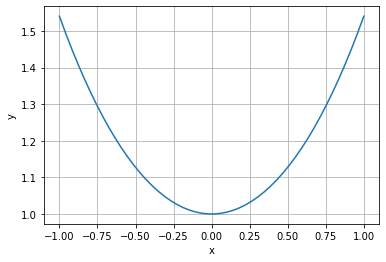

In [2]:
f = lambda x: np.cos(x)+x**2

plt.plot(x,f(x))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie.
Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodledgłym 1000 punktów.

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.

***Wskazówka:*** Użycie funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* dla $f(x) = cos(x) + x^2$ obrazuje przykład:

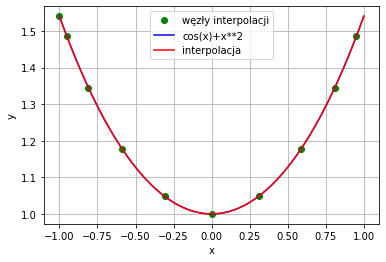

In [3]:
from scipy.interpolate import barycentric_interpolate
# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nods_number = 10
xch = np.cos(np.linspace(1,interpolation_nods_number,interpolation_nods_number)*np.pi/interpolation_nods_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.plot(x,f(x),'b',label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$.


***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).


***Zadanie 6.***
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

***Zadanie 7.***
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią? 
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)